***LINEAR REGRESSION***

In [29]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [6]:
df=pd.read_csv('USA_Housing.csv')

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1059033.557870,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1505890.914847,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1058987.987876,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1260616.806629,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,630943.489339,USNS Raymond\nFPO AE 09386


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 312.5+ KB


In [9]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1232072.654142
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,353117.626581
min,17796.631190,2.644304,3.236194,2.000000,172.610686,15938.657923
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,997577.135049
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1232669.377966
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1471210.204212
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2469065.594175


In [10]:
df.columns

Index([u'Avg. Area Income', u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population', u'Price', u'Address'],
      dtype='object')

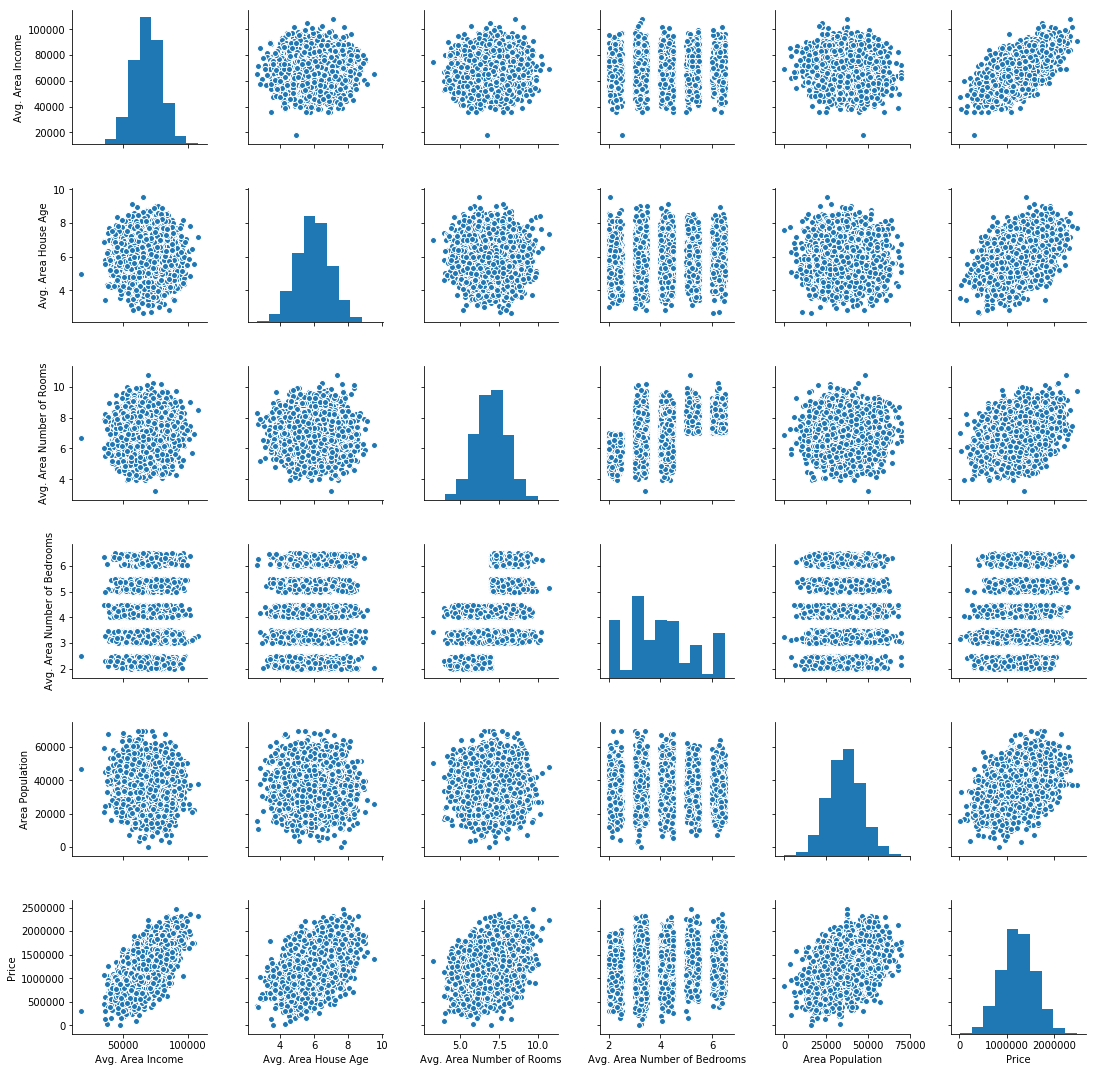

In [11]:
sns.pairplot(df)

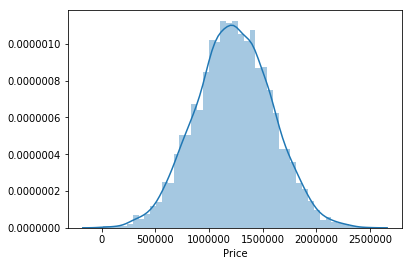

In [12]:
sns.distplot(df['Price'])

In [14]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


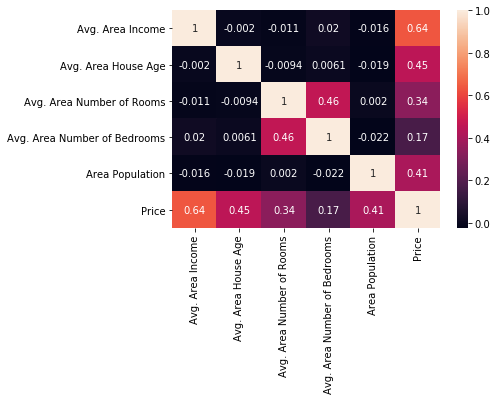

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
#features data
X=df[[u'Avg. Area Income', 
      u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population']]

In [37]:
#label data
y=df['Price']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lm=LinearRegression()

In [42]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
#The intercept (often labeled the constant) is the expected mean value of Y when all X=0
print(lm.intercept_)

-2640159.796853739


In [46]:
#coeeficient relates to each features 
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [33]:
X_train.columns

Index([u'Avg. Area Income', u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population'],
      dtype='object')

In [45]:
cdf=pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeff'])

In [48]:
'''what does these co-efficients tell us is that say for Eg if all the other features
except Avg.Area Income were kept constant then a unit increase in Avg.Area Income will 
lead to the $21.52 increase in price '''
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [49]:
 from sklearn.datasets import load_boston

In [51]:
boston=load_boston()

In [53]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [60]:
print("DESCRIPTION\n")
print(boston['DESCR'])
print("\nDATA\n")
print(boston['data'])
print("\nFEATURE NAMES\n")
print(boston['feature_names'])

DESCRIPTION

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio b

In [62]:
predictions=lm.predict(X_test)

In [63]:
predictions

array([1260960.70567629,  827588.75560301, 1742421.24254363, ...,
        372191.40626868, 1365217.15140901, 1914519.54178955])

In [64]:
y_test

1718    1251688.615703
2511     873048.319642
345     1696977.662833
2521    1063964.287874
54       948788.275709
2866     730043.645060
2371    1166925.146149
2952     705444.116791
45      1499988.879523
4653    1288199.152729
891     1441736.760838
3011    1279681.154397
335     1754969.161945
3050    1511653.454804
3850    1441956.201936
834     1119992.618835
3188     727866.525168
4675    1138885.104005
2564    1074263.317236
1866    1386473.365381
1492     404643.602243
3720    1449829.493750
618     1775874.760104
3489    1202050.584260
2145    1105737.461544
3200    1835564.689208
4752    1795428.774390
602     1424283.373184
4665    1365945.082783
79      1492011.495862
             ...      
4668    1537864.882007
3762     426906.182869
236      809089.671945
4897    1169265.146219
1283     980983.210952
2443     549167.939855
3600     823864.387737
2138    1467959.528791
254      822431.730265
3987    1550931.067844
527     1293746.875866
1362     758262.612111
4577    147

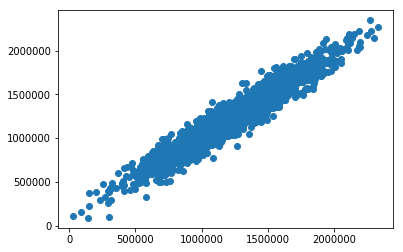

In [65]:
#one quick way to visualise analyze how far the predictions are correct with respect to y_test
plt.scatter(y_test,predictions)
#straight lines represent a pretty good predictions

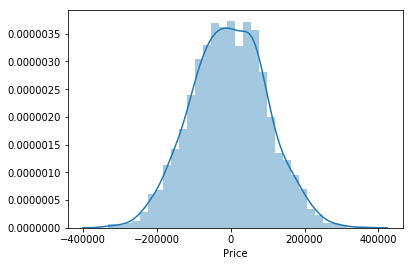

In [67]:
#distribution of residuals
sns.distplot(y_test-predictions)
#It should be normally distributed for good predictions

In [72]:
#Different metrics for evaluation
from sklearn import metrics

In [69]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914928

In [70]:
metrics.mean_squared_error(y_test,predictions)

10460958907.208244

In [71]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922290538